Osnabrück University - Computer Vision (Winter Term 2018/19) - Prof. Dr.-Ing. G. Heidemann, Ulf Krumnack, Axel Schaffland

# Exercise Sheet 08: Template Matching and Pattern Recognition

## Introduction

This week's sheet should be solved and handed in before the end of **Sunday, January 13, 2019**. If you need help (and Google and other resources were not enough), feel free to contact your groups' designated tutor or whomever of us you run into first. Please upload your results to your group's Stud.IP folder.

## Exercise 0: Math recap (Covariance) [0 Points]

This exercise is supposed to be very easy, does not give any points, and is voluntary. There will be a similar exercise on every sheet. It is intended to revise some basic mathematical notions that are assumed throughout this class and to allow you to check if you are comfortable with them. Usually you should have no problem to answer these questions offhand, but if you feel unsure, this is a good time to look them up again. You are always welcome to discuss questions with the tutors or in the practice session. Also, if you have a (math) topic you would like to recap, please let us know.

**a)** What does *covariance* express?

YOUR ANSWER HERE

**b)** Provide a formula to compute the covariance of two 1-dimensional datasets. How can it be generalized to the $n$-dimensional case?

YOUR ANSWER HERE

**c)** Create and plot two (1-dimensional) datasets with low covariance (use `plt.scatter`). Then do the same for two datasets with high covariance.

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# YOUR CODE HERE

## Exercise 1: Template Matching [4 points]

**a)** Explain in your own words the idea of *template matching*. Is it a data or model based approach? What are the advantages and disadvantages? In what situations would you apply template matching?

Template matching is a model based approach where an image is scanned for a simple template (e.g. a cirle). To determine whether the template can be found in the image, a similarity measure between the template and the image is calculated. This is done for each possible location of the template (similar to convolution).

**Advantages:**
- robust to noise
- okayish when template is rotated
- can be implemented efficiently

**Disadvantages:**
- template may not be detected when gray values are incorrectly scaled (depending on similarity measure)
- does not deal well with viewpoint variation
- no invariance
- gray value ratio must match the image

When I know that the sought shape always has the same viewpoint and gray value ratio, template matching is a good choice.

**b)** Explain the ideas of *mean absolute difference* and *correlation coefficient*? Name pros and cons.

**Mean absolute difference**
- simply calcutaes the mean/average (absolute) difference in gray values
- $\frac{1}{MN}\sum_{ij} | g(x+i,y+j) - T(i,j) |$

| Pro | Contra |
| --- | ------ |
| easy | gray values scaling problem |
| robust to noise |  |
| rotation invariant |  |
| easy to calculate |  |


**Correlation Coefficient:**
- uses the covariance to determine correlation
- $C_{g,T} = \sigma_{g,T}/\sigma_g\sigma_T$

| Pro | Contra |
| --- | ------ |
| robust to scaling | slightly harder to calculate |
| robust to noise |  |
| rotation invariant |  |

## Exercise 2: Where is Waldo [6 points]

In the two images `wheresWaldo1.jpg` and `wheresWaldo2.jpg`, Waldo is hiding in the midst of a busy crowd. He always wears the same red and white striped sweater and hat. However, he may be carrying a something that varies from scene to scene. Use template matching with the given Waldo templates (`waldo*.jpg`) to locate Waldo. Highlight
Waldo in the scene and indicate which template was matched.

**Hints:**
* You may use buildin functions to solve this exercise.
* The images are quite large! You may start by testing your code on a small image patch before applying it to the full scene.
* You may not achieve a perfect match. Analyse the problems you encounter and think how you can improve your result.

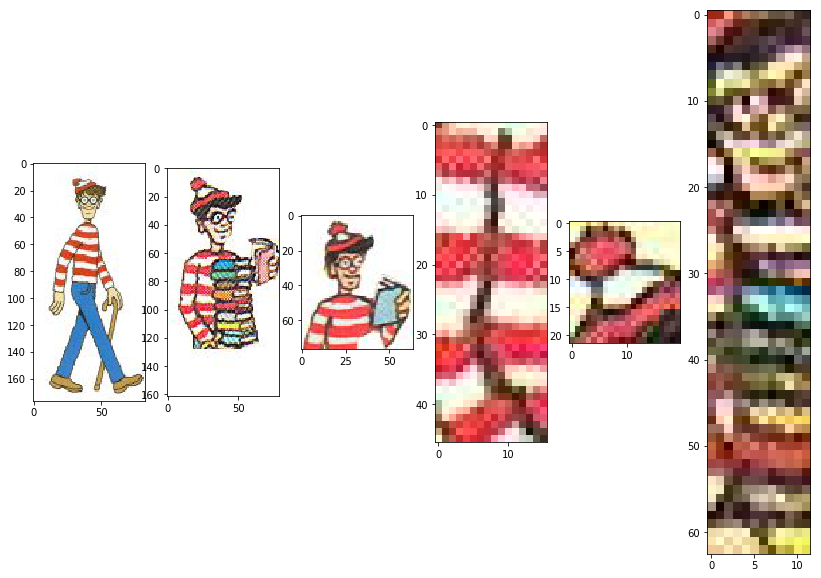

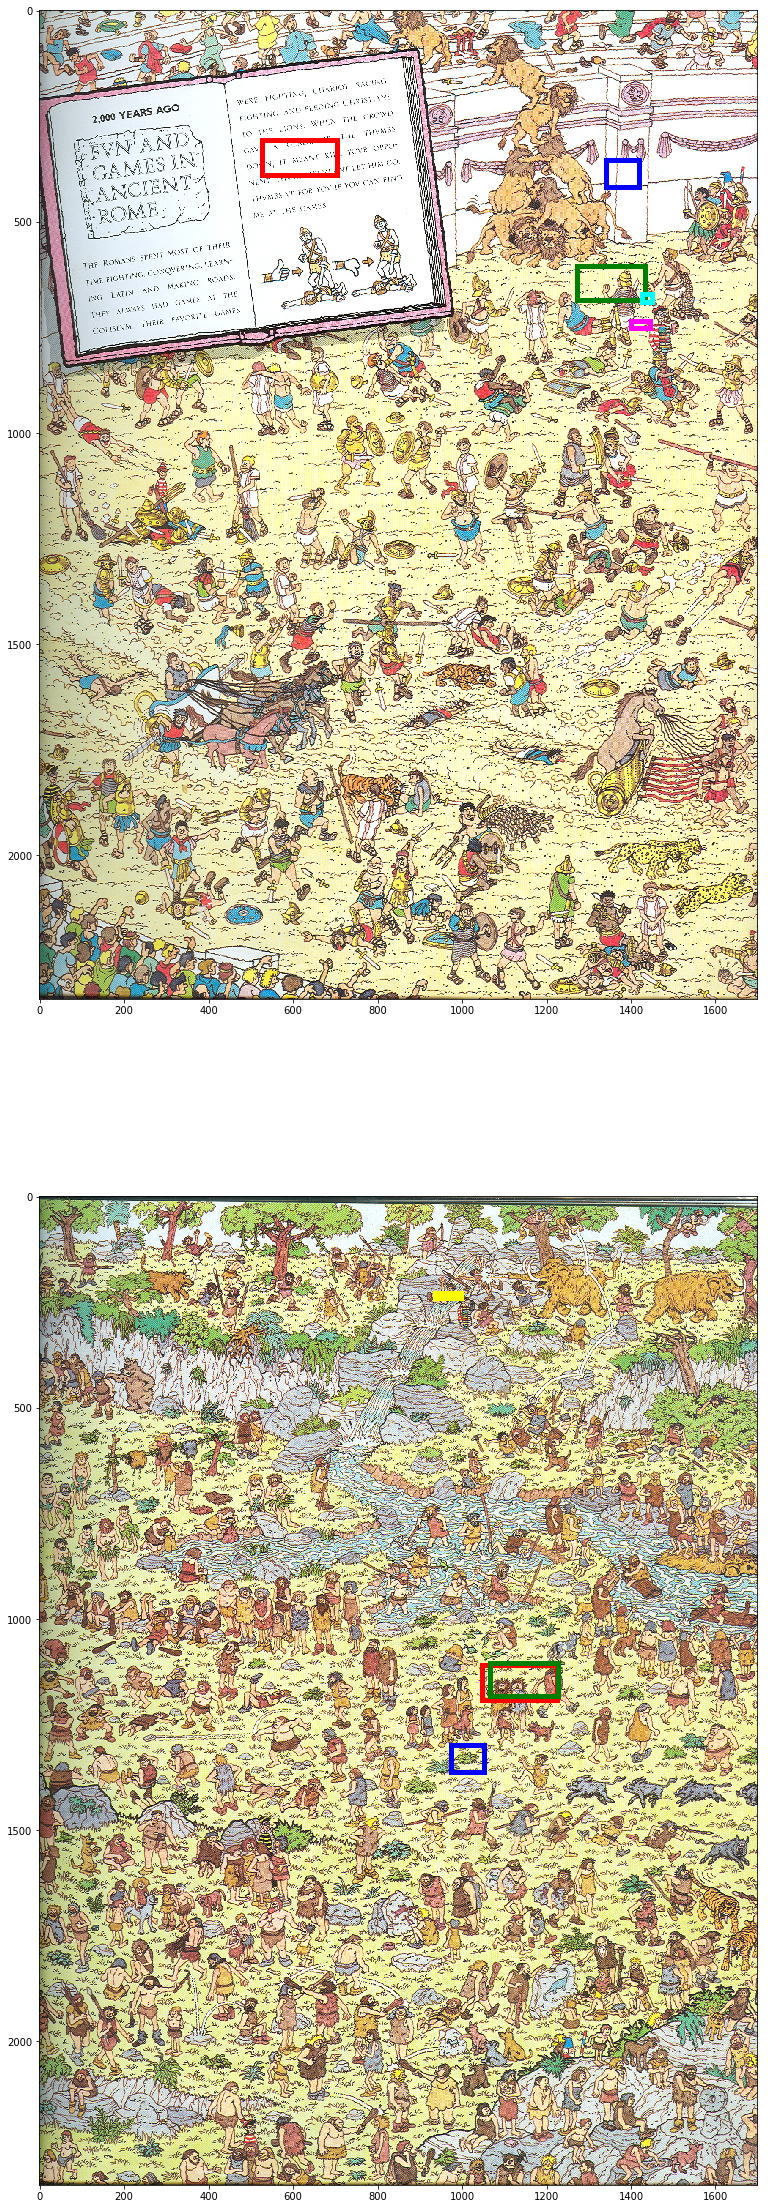

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage.feature import match_template

waldos = [plt.imread('images/waldo/wheresWaldo{}.jpg'.format(i)) for i in range(1, 3)]
templates = [plt.imread('images/waldo/waldo{}.jpg'.format(i)) for i in range(0, 6)]
    
plt.figure(figsize = (14, 10))
for i,img in enumerate(templates):
    plt.subplot(1,len(templates),i+1)
    plt.imshow(img)

ec = ['r', 'g', 'b', 'magenta', 'cyan', 'yellow']

def get_location(result):
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
    # Depending on the method used, return the correct location
    return max_loc

#     ij = np.unravel_index(np.argmax(result), result.shape)
#     return ij[0], ij[1] 

def find_template(img, t):
    """
    Tries to find something from a given set of templates in image
    by using the given method.
    
    Args:
        img - the image which to find sth in
        t - array of templates which to test with
        method - cv2 method to use for template matching
        
    Returns:
        indices - for which templates sth was found in the image
        positions - where it was found
    """
    positions = np.full((img.shape[0],img.shape[1]), -1)
    
    for i,templ in np.ndenumerate(t):
        result = cv2.matchTemplate(img, templ, method=cv2.TM_CCORR_NORMED) #match_template(img,templ) #
        #x,y = get_location(result)
        loc = get_location(result)
        if loc != None and loc[1] <= positions.shape[1]:
            positions[loc[0]-templ.shape[0],loc[1]-templ.shape[1]] = i[0]
    
    return positions

def mark_templates(ax, t, pos):
    for (x,y),p in np.ndenumerate(pos):
        if p >= 0:
            rect = plt.Rectangle((x, y), t[p].shape[0], t[p].shape[1], edgecolor=ec[p], facecolor='none', linewidth=5.0)
            ax.add_patch(rect)
            #img[x:x+t[p].shape[0],y:y+t[p].shape[1],:] = t[p]/5
        
results = []
for w in waldos:
    w.setflags(write=1)
    results.append(find_template(w, templates))
            
plt.figure(figsize=(14,40))
for i,img in enumerate(waldos):
    ax = plt.subplot(len(waldos),1,i+1)
    ax.imshow(img)    
    mark_templates(ax, templates, results[i])


YOUR CODE HERE

## Exercise 3: Pattern Recognition and PCA [4 points]

**a)** What are the goals of *pattern recognition*? How can they be achieved? What are the problems?

The goal is to get some symbolic/semantic description from image data. It is achieved by first extracting features from an image and then applying a classifier to get the symbolic representation. The former may be implemented using unsupervised learning while the latter uses supervised learning.

**Problems:**

Usually the are too many degrees of freedom, including viewpoint, illumination, occlusion and others that make the task of finding a fitting model quite complex.

**b)** What is *principal component analysis*? How is it related to pattern recognition?

PCA calculates the eigenvalues and eigenevectors of the correlation matrix. Then the eigenvectors (which are always orhtogonal to each other) with the largest eingenvalues can be used to project the data such that less meaningful information is ignored and (hopefully) the more meaningful information is displayed.

**c)** Explain how principal components can be computed? Then implement a function that performs the computation.

See above.

In [14]:
from scipy import linalg

def pca(data, dims_rescaled_data=2):
    m, n = data.shape
    data_centered = data - data.mean(axis=0)
    # calculate the covariance matrix
    R = np.cov(data_centered, rowvar=False)
    # calculate eigenvectors & eigenvalues of the covariance matrix
    # use 'eigh' rather than 'eig' since R is symmetric, 
    # the performance gain is substantial
    evals, evecs = linalg.eigh(R)
    idx = np.argsort(evals)[::-1]
    evecs = evecs[:,idx]
    evals = evals[idx]
    evecs = evecs[:, :dims_rescaled_data]
    # carry out the transformation on the data using eigenvectors
    # and return the re-scaled data, eigenvalues, and eigenvectors
    return np.dot(evecs.T, data_centered.T).T, evals, evecs

## Exercise 4: Eigenfaces [6 points]

**a)** Import the images from the directory `images/trainimgs` into an numpy array using the function 
`read_images_from_directory` provided in the cell below. Display the images and the corresponding names.

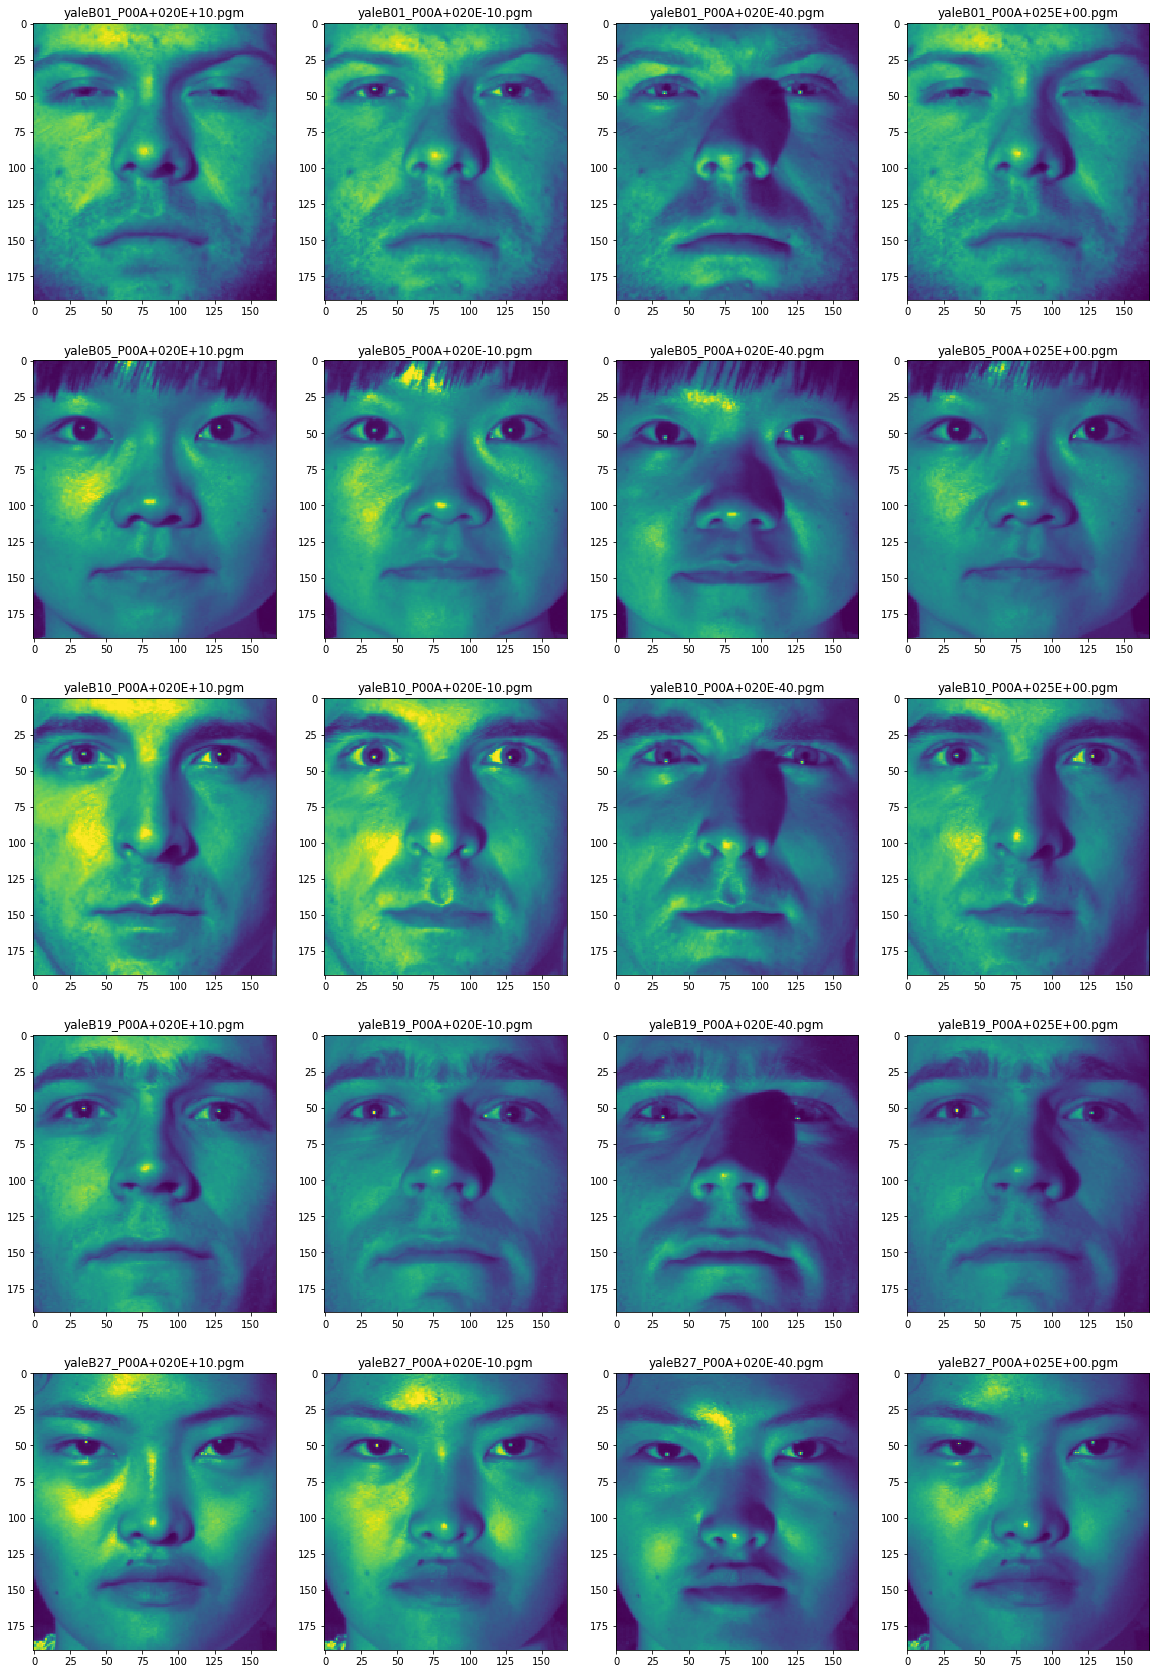

In [2]:
%matplotlib inline
import sys
import os
import glob
import numpy as np
import matplotlib.pyplot as plt

def read_images_from_directory(directory, suffix, shape):
    """
    Read all images found in DIRECTORY with given file
    name SUFFIX. All images should have the same SHAPE,
    specified as (rows,columns).
    
    Returns:
        images: A numpy array of shape m*rows*columns (from shape)
        names: A list of corresponding image names.
    """

    # initialize the image array and name list
    #images = np.empty((0, *shape))
    images = np.empty((0, ) + shape)
    names = []

    # now loop through all image files in the directory
    for file_name in glob.glob(directory + os.sep + '*.' + suffix):
        
        if os.path.isfile(file_name):
            # load each image (as double)
            img = plt.imread(file_name)

            # check for correct size
            if img.shape == shape:
                images = np.append(images, img.reshape((1, ) + shape), axis=0)
                names.append(os.path.basename(file_name))
            else:
                print(
                    'warning: Image "' + file_name +
                    '" with wrong size will be ignored!',
                    file=sys.stderr)

    return images, names


# image file suffix
suffix = 'pgm'

# image size
img_shape = (192, 168)

images, names = read_images_from_directory("images/trainimg", suffix, img_shape)

img_num = len(names)

plt.figure(figsize=(20,30))
for i in range(img_num):
    plt.subplot(img_num/4, 4, i+1)
    plt.title(names[i])
    plt.imshow(images[i])

**b)** Use PCA to compute the eigenfaces (i.e. the eigenvectors of the face images). You may use your PCA function from Exercise 3 or some build in function. Explain what kind of input PCA expects, and how that fits to our images (you may have to `reshape` the images!). Finally, display the eigenfaces.

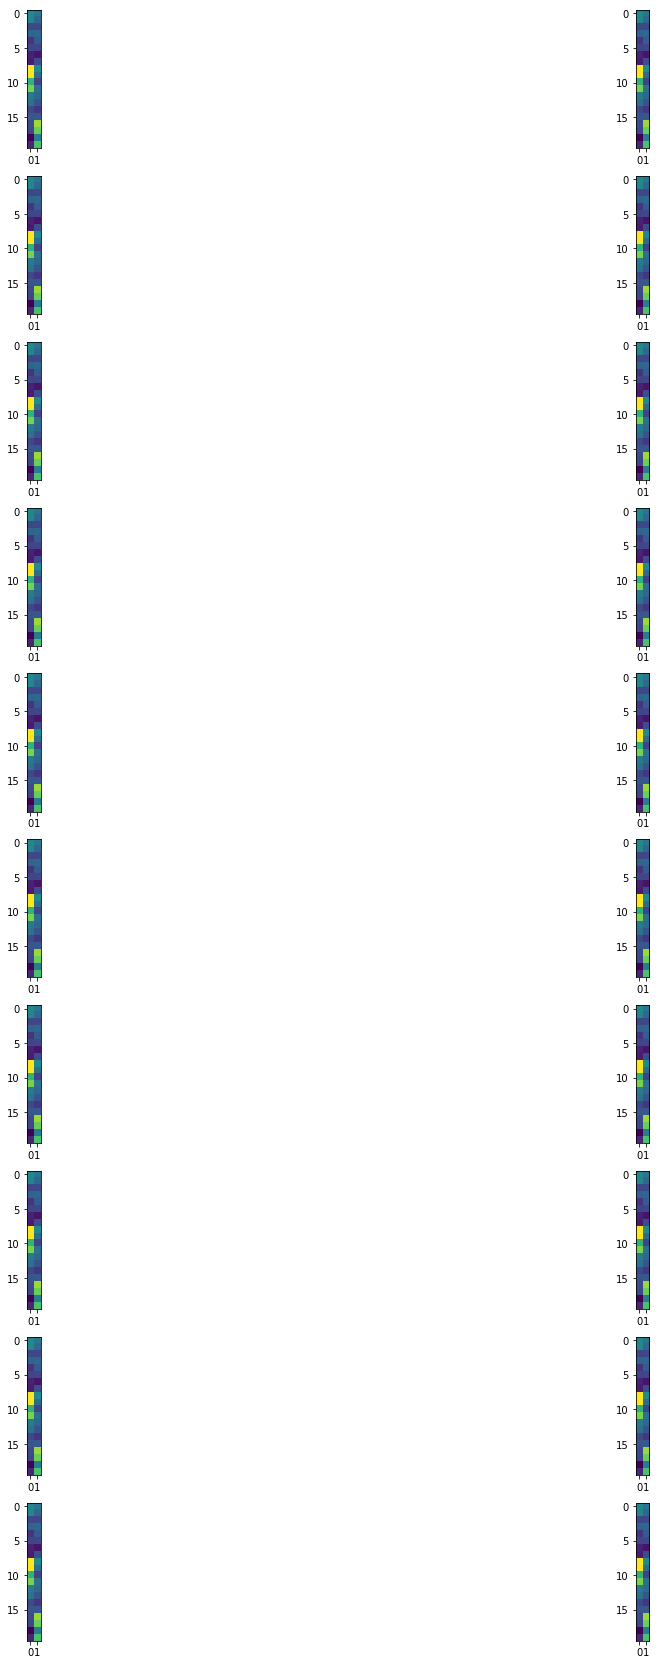

In [6]:
from sklearn.decomposition import PCA

# projected, eigenvectors, eigenvalues
#pca_results = [pca(face) for face in images]

pca_d = PCA(n_components=2)
pca_result = pca_d.fit_transform(images[:,:,0])

plt.figure(figsize=(20,30))
for i in range(len(pca_result)):
    plt.subplot(len(pca_result)/2, 2, i+1)
    plt.imshow(pca_result)

**c)** Now project the training face images into the eigenspace to calculate their ”feature vectors”,
i.e. a representation with significantly lower dimension. For the projection of the face images,
they have to be centered first, i.e. the mean face vector has to be subtracted. Store the mean face in some vector (`mean_face`) and the representation achieved in some array (`face_db`). Finally restore the images from `face_db` and display them alongside the original image. Try out the effect of changing the number of eigenfaces to be used (`num_eigenfaces`).

In [ ]:
# number of eigenfaces to be used
num_eigenfaces = 10


**d)** Implement the function `recognize_face` that recognizes a face from that database by calculating the euclidean distance of this face feature vector to all of the training feature vectors from the database. The feature vector with the smallest distance represents the winner category. Check your implementation by recognizing the images from the training set (they should be recognized without error).

In [ ]:
from scipy.spatial.distance import cdist

def recognize_face(face, eigenfaces, mean_face, face_db):
    """
    Recognize a face from a face database.
    and return the index of the best matching database entry.

    The FACE is first centered and projected into the eigeface
    space provided by EIGENFACES. Then the best match is found
    according to the euclidean distance in the eigenface space.
    """
    index = -1

    # YOUR CODE HERE

    return index


# ... and now check your function on the training set ...
# YOUR CODE HERE

**e)** Now classify the images in directory `images/testimg/`. Try to reduce the number of principal components
used. How many PCs are necessary to still achieve perfect classification?

In [ ]:
test_imgs, test_names = read_images_from_directory('images/testimg', suffix,
                                                   img_shape)

# YOUR CODE HERE